In [1]:
import fiona
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
import cartopy.feature as cf
from collections import defaultdict
from descartes.patch import PolygonPatch

In [4]:
# Create method to change datasets easily- 
test_data_dir = 'Test_data'
region = 'Ellesmere'
# region = 'Antarctica'
# region = 'Iceland'
# region = 'World'

data_path = os.path.join(test_data_dir, region, 'glims_polygons.shp')

In [5]:
# Open file with fiona
features = fiona.open(data_path, 'r')

# Create default dictionary where number of glacier outlines for each glacier id will be stored
glac_count_by_id = defaultdict(int)

# Create default dictionary where geometries for each glacier id will be stored
polygons = defaultdict(int)

In [6]:
for feat in features:
    # Make sure line type is glac_bound
    if feat['properties']['line_type'] != 'glac_bound':
        continue

    # Get glacier id
    gid = feat['properties']['glac_id']
    
    # Count each instance of glacier id and append count to defaultdict
    glac_count_by_id[gid] += 1

    # Get geometry, store in defaultdict
    polygons[gid] = feat['geometry']

In [7]:
# Get max/min outline_count
maximum = max(glac_count_by_id.values())
minimum = 1
maximum

12

In [8]:
if maximum > 10:
    maximum = 11

In [9]:
# Create colormap
# Stepped discrete colormap with green, blue, orange hue ranges
cmap = mpl.colors.ListedColormap(["#3f007d", "#54278f", "#6a51a3", "#006d2c", "#238b45", "#41ab5d", "#d94801", "#f16913", "#fd8d3c", "#E8FF00"])

In [10]:
# norm acts as a function
norm = mpl.colors.Normalize(minimum,maximum)

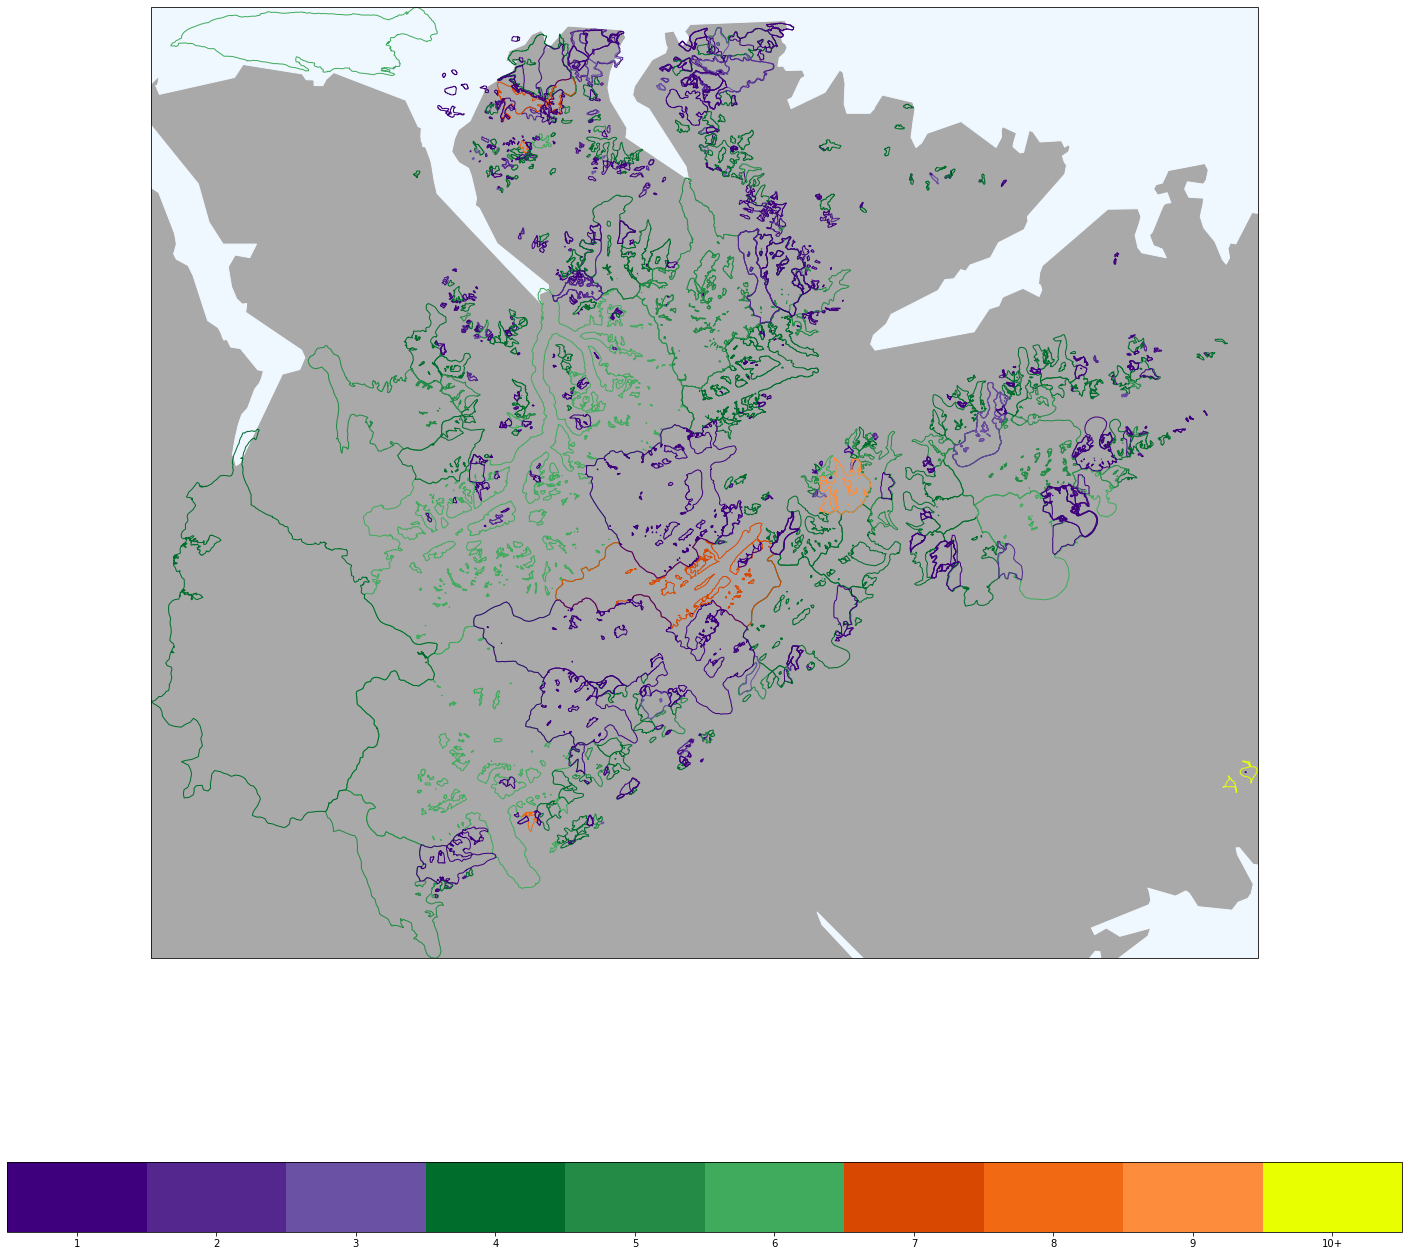

In [11]:
plt.figure(figsize = (25, 25))

ax = plt.axes(projection = ccrs.Mercator.GOOGLE)

for gid in glac_count_by_id:
    
    outline_count = glac_count_by_id[gid]
    
    rgb = cmap(norm(outline_count))
    
    patch = PolygonPatch(polygons[gid], facecolor = 'none', edgecolor = rgb, transform = ccrs.PlateCarree())

    ax.add_patch(patch)

ax.add_feature(cf.LAND, facecolor = 'darkgray')
ax.add_feature(cf.OCEAN, facecolor = 'aliceblue')

# Set map extent to data bounds
extent = features.bounds
ax.set_extent([extent[2], extent[0], extent[1], extent[3]])

# Add colorbar
sm = plt.cm.ScalarMappable(cmap = cmap, norm = norm)
cb = plt.colorbar(sm, ax = ax, orientation = 'horizontal', ticks = range(maximum))

# Arrange tick marks 
tick_locs = np.arange(maximum) + 0.5   
cb.set_ticks(tick_locs)
cb.set_ticklabels(np.arange(maximum))
cb.ax.set_xticklabels(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10+'])

plt.show()